<a href="https://colab.research.google.com/github/ainulmrdh02/FYP/blob/main/dental_unet_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 0. Mount Google Drive first
from google.colab import drive
drive.mount('/content/drive')

dataset_path = "/content/drive/MyDrive/FYP stuff/thirdmolar_dataset"

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split

In [ ]:
# 2. Dataset Class
class DentalXrayDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.image_paths = []
        for root, _, files in os.walk(root_dir):
            for file in files:
                if file.lower().endswith(('png', 'jpg', 'jpeg')):
                    self.image_paths.append(os.path.join(root, file))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('L')  # Grayscale
        if self.transform:
            image = self.transform(image)
        return image, image

In [ ]:
# 3. UNet Autoencoder (Grayscale)
class UNetAutoencoder(nn.Module):
    def __init__(self):
        super(UNetAutoencoder, self).__init__()
        self.enc1 = self.conv_block(1, 32)
        self.enc2 = self.conv_block(32, 64)
        self.enc3 = self.conv_block(64, 128)
        self.enc4 = self.conv_block(128, 256)
        self.bottleneck = self.conv_block(256, 512)
        self.dec4 = self.deconv_block(512, 256)
        self.dec3 = self.deconv_block(256, 128)
        self.dec2 = self.deconv_block(128, 64)
        self.dec1 = self.deconv_block(64, 32)
        self.final_layer = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(16, 1, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

    def deconv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )

    def forward(self, x):
        x1 = self.enc1(x)
        x2 = self.enc2(x1)
        x3 = self.enc3(x2)
        x4 = self.enc4(x3)
        b = self.bottleneck(x4)
        d4 = self.dec4(b) + x4
        d3 = self.dec3(d4) + x3
        d2 = self.dec2(d3) + x2
        d1 = self.dec1(d2) + x1
        return self.final_layer(d1)

In [ ]:
# 4. Set Path & Transform
# 👇 Update this only if you change folder name or location in your Drive
dataset_path = "/content/drive/MyDrive/thirdmolar_dataset"

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/FYP stuff/thirdmolar_dataset"

for root, dirs, files in os.walk(dataset_path):
    print(f"📂 Folder: {root}")
    for file in files:
        print("   📄", file)


📂 Folder: /content/drive/MyDrive/FYP stuff/thirdmolar_dataset
   📄 .DS_Store
📂 Folder: /content/drive/MyDrive/FYP stuff/thirdmolar_dataset/left
   📄 .DS_Store
📂 Folder: /content/drive/MyDrive/FYP stuff/thirdmolar_dataset/left/horizontal
   📄 g (68).jpg
   📄 g (56).jpg
   📄 g (39).jpg
   📄 g (17).jpg
   📄 g (20).jpg
   📄 g (7).jpg
   📄 g (13).jpg
   📄 g(1).PNG
   📄 g (50).jpg
   📄 g (42).jpg
   📄 g (6).jpg
   📄 g (35).jpg
   📄 g (47).jpg
   📄 g (3).jpg
   📄 g (63).jpg
   📄 g (36).jpg
   📄 g (48).jpg
   📄 g (67).jpg
   📄 g (23).jpg
   📄 g (33).jpg
   📄 g (26).jpg
   📄 g (29).jpg
   📄 g (53).jpg
   📄 g (71).jpg
   📄 g (15).jpg
   📄 g (43).jpg
   📄 g (6).PNG
   📄 g (10).jpg
   📄 g (41).jpg
   📄 g (37).jpg
   📄 g (5).PNG
   📄 g (57).jpg
   📄 g (34).jpg
   📄 g (73).jpg
   📄 g (72).jpg
   📄 g (21).jpg
   📄 g (55).jpg
   📄 g (8).jpg
   📄 g (62).jpg
   📄 g (3).PNG
   📄 g (46).jpg
   📄 g (69).jpg
   📄 g (60).jpg
   📄 g (2).jpg
   📄 g (18).jpg
   📄 g (59).jpg
   📄 g (19).jpg
   📄 g (2).PNG
   📄 g

In [ ]:
class DentalXrayDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.image_paths = []
        for root, _, files in os.walk(root_dir):
            for file in files:
                clean_name = file.strip().lower()  # 💡 remove spaces + lowercase
                if clean_name.endswith(('.png', '.jpg', '.jpeg')):
                    full_path = os.path.join(root, file)
                    self.image_paths.append(full_path)
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('L')
        if self.transform:
            image = self.transform(image)
        return image, image


In [ ]:
dataset_path = "/content/drive/MyDrive/FYP stuff/thirdmolar_dataset"
dataset = DentalXrayDataset(dataset_path, transform)
print(f"🦷 Total images loaded: {len(dataset)}")


🦷 Total images loaded: 813


In [ ]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from PIL import Image
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split


In [ ]:
class DentalXrayDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.image_paths = []
        for root, _, files in os.walk(root_dir):
            for file in files:
                clean_name = file.strip().lower()
                if clean_name.endswith(('.png', '.jpg', '.jpeg')):
                    self.image_paths.append(os.path.join(root, file))
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('L')  # Grayscale
        if self.transform:
            image = self.transform(image)
        return image, image


In [ ]:
class UNetAutoencoder(nn.Module):
    def __init__(self):
        super(UNetAutoencoder, self).__init__()

        # Encoder
        self.enc1 = self.conv_block(1, 32)
        self.enc2 = self.conv_block(32, 64)
        self.enc3 = self.conv_block(64, 128)
        self.enc4 = self.conv_block(128, 256)

        # Pooling
        self.pool = nn.MaxPool2d(2)

        # Bottleneck
        self.bottleneck = self.conv_block(256, 512)

        # Decoder
        self.up4 = self.up_conv(512, 256)
        self.dec4 = self.conv_block(512, 256)  # 256 from up + 256 from enc

        self.up3 = self.up_conv(256, 128)
        self.dec3 = self.conv_block(256, 128)

        self.up2 = self.up_conv(128, 64)
        self.dec2 = self.conv_block(128, 64)

        self.up1 = self.up_conv(64, 32)
        self.dec1 = self.conv_block(64, 32)

        # Final Output Layer
        self.final_layer = nn.Sequential(
            nn.Conv2d(32, 1, kernel_size=1),
            nn.Sigmoid()
        )

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def up_conv(self, in_channels, out_channels):
        return nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2)

    def forward(self, x):
        # Encoder with pooling
        e1 = self.enc1(x)
        p1 = self.pool(e1)

        e2 = self.enc2(p1)
        p2 = self.pool(e2)

        e3 = self.enc3(p2)
        p3 = self.pool(e3)

        e4 = self.enc4(p3)
        p4 = self.pool(e4)

        # Bottleneck
        b = self.bottleneck(p4)

        # Decoder with concatenation
        u4 = self.up4(b)
        d4 = self.dec4(torch.cat([u4, e4], dim=1))

        u3 = self.up3(d4)
        d3 = self.dec3(torch.cat([u3, e3], dim=1))

        u2 = self.up2(d3)
        d2 = self.dec2(torch.cat([u2, e2], dim=1))

        u1 = self.up1(d2)
        d1 = self.dec1(torch.cat([u1, e1], dim=1))

        return self.final_layer(d1)

In [ ]:
# Path to your dataset in Google Drive
dataset_path = "/content/drive/MyDrive/FYP stuff/thirdmolar_dataset"

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

dataset = DentalXrayDataset(dataset_path, transform)
print(f"🦷 Total images loaded: {len(dataset)}")

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


🦷 Total images loaded: 813


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNetAutoencoder().to(device)

mse = nn.MSELoss()
l1 = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def add_noise(img, noise_factor=0.1):
    noise = torch.randn_like(img) * noise_factor
    return torch.clamp(img + noise, 0., 1.)


In [ ]:
num_epochs = 15
model.train()

for epoch in range(num_epochs):
    running_loss = 0
    for images, _ in train_loader:
        images = images.to(device)
        noisy = add_noise(images)

        optimizer.zero_grad()
        outputs = model(noisy)
        loss = mse(outputs, images) + 0.1 * l1(outputs, images)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    avg_loss = running_loss / len(train_loader.dataset)
    print(f"📉 Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.6f}")


📉 Epoch 1/15 - Loss: 0.009135
📉 Epoch 2/15 - Loss: 0.004368
📉 Epoch 3/15 - Loss: 0.004251
📉 Epoch 4/15 - Loss: 0.004060
📉 Epoch 5/15 - Loss: 0.004043
📉 Epoch 6/15 - Loss: 0.004030
📉 Epoch 7/15 - Loss: 0.003936
📉 Epoch 8/15 - Loss: 0.004040
📉 Epoch 9/15 - Loss: 0.003984
📉 Epoch 10/15 - Loss: 0.003826
📉 Epoch 11/15 - Loss: 0.003802
📉 Epoch 12/15 - Loss: 0.003754
📉 Epoch 13/15 - Loss: 0.003808
📉 Epoch 14/15 - Loss: 0.003689
📉 Epoch 15/15 - Loss: 0.003657


In [ ]:
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim, peak_signal_noise_ratio as psnr

# 1. Function to denoise a single image
def denoise_image(image, model):
    model.eval()
    with torch.no_grad():
        image = image.unsqueeze(0).to(device)  # Add batch dimension
        output = model(image).squeeze(0).cpu()  # Remove batch dimension
    return torch.clamp(output, 0, 1)  # Keep values in [0,1]

# 2. PSNR computation
def calculate_psnr(img1, img2):
    img1_np = img1.cpu().detach().numpy()
    img2_np = img2.cpu().detach().numpy()
    return psnr(img1_np, img2_np, data_range=1.0)

# 3. SSIM computation for grayscale
def calculate_ssim(img1, img2):
    img1_np = img1.cpu().detach().numpy().squeeze()
    img2_np = img2.cpu().detach().numpy().squeeze()
    return ssim(img1_np, img2_np, data_range=1.0, win_size=3)

# 4. Pick one image from validation set
test_image = val_dataset[0][0]  # Only the image, not label
noisy_image = add_noise(test_image).to(device)
denoised_image = denoise_image(noisy_image, model)

# 5. Calculate metrics
psnr_noisy = calculate_psnr(test_image, noisy_image.cpu())
ssim_noisy = calculate_ssim(test_image, noisy_image.cpu())

psnr_denoised = calculate_psnr(test_image, denoised_image)
ssim_denoised = calculate_ssim(test_image, denoised_image)

print(f"PSNR (Noisy): {psnr_noisy:.4f}, SSIM (Noisy): {ssim_noisy:.4f}")
print(f"PSNR (Denoised): {psnr_denoised:.4f}, SSIM (Denoised): {ssim_denoised:.4f}")


PSNR (Noisy): 20.1730, SSIM (Noisy): 0.2951
PSNR (Denoised): 30.6020, SSIM (Denoised): 0.8747


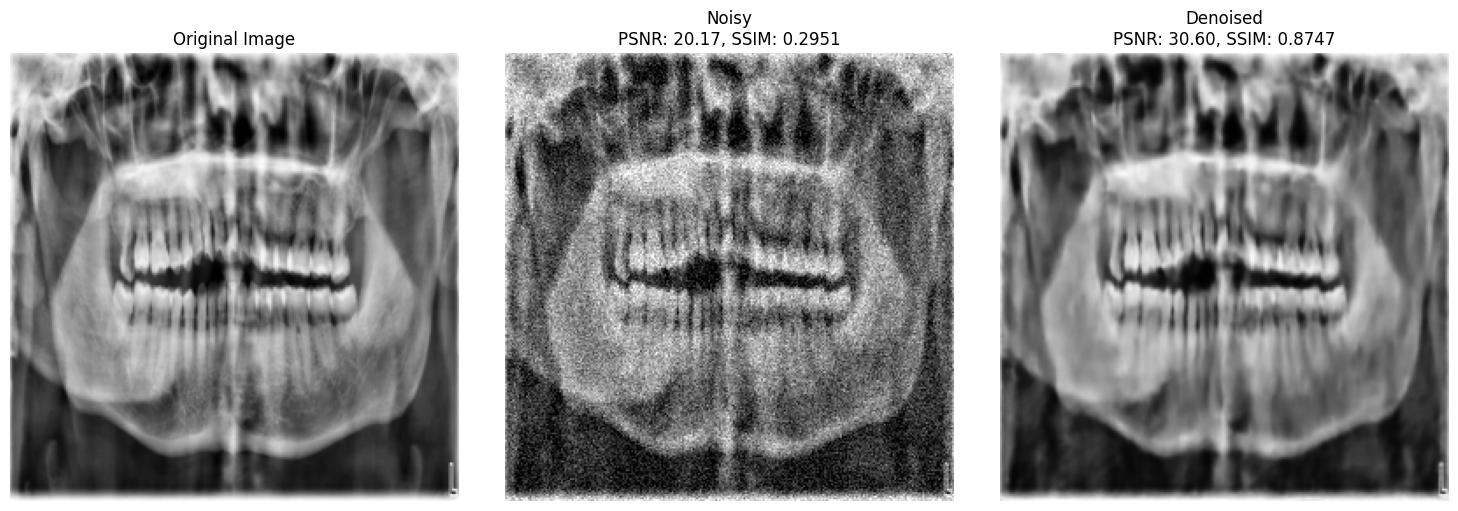

In [ ]:
# 6. Plot side-by-side comparison
plt.figure(figsize=(15, 5))

# Original
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(test_image.squeeze(), cmap='gray')
plt.axis('off')

# Noisy
plt.subplot(1, 3, 2)
plt.title(f"Noisy\nPSNR: {psnr_noisy:.2f}, SSIM: {ssim_noisy:.4f}")
plt.imshow(noisy_image.cpu().squeeze(), cmap='gray')
plt.axis('off')

# Denoised
plt.subplot(1, 3, 3)
plt.title(f"Denoised\nPSNR: {psnr_denoised:.2f}, SSIM: {ssim_denoised:.4f}")
plt.imshow(denoised_image.squeeze(), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
torch.save(model.state_dict(), "unet_autoencoder.pth")
print("✅ Model saved as unet_autoencoder.pth")


✅ Model saved as unet_autoencoder.pth


In [ ]:
from google.colab import files
files.download("unet_autoencoder.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>